The regression coefficients are 24.815544052284988 43.4989785533412


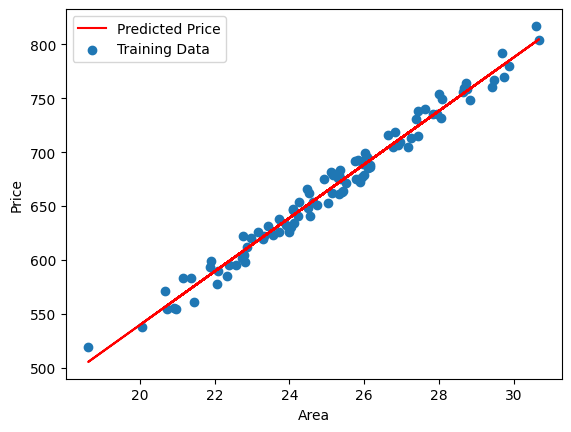

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])

W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area)) ** 2)
b = np.mean(price) - W * np.mean(area)

print("The regression coefficients are", W, b)

y_pred = W * area + b

plt.plot(area, y_pred, color='red', label='Predicted Price')
plt.scatter(data['area'], data['price'], label='Training Data')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()



# matplot, numpy, pandas 정리

# 다중 선형회귀

평균 제곱 오차(MSE)를 예측값 $\hat{Y}$와 실제값 $Y$로 정의할 때, $\hat{Y}$는 각 특성값에 해당하는 가중치를 곱한 후 합산한 값에 바이어스를 더한 값으로 나타낼 수 있습니다.

선형 회귀 모델의 예측값 $\hat{Y}$는 다음과 같이 정의됩니다:

$\hat{Y} = W^T X + b$

여기서:
- $W$는 가중치 벡터
- $X$는 입력 벡터
- $b$는 바이어스 (절편)
- $W^T X$는 가중치 벡터 $W$와 입력 벡터 $X$의 내적

각 데이터 포인트 $i$에 대해 예측값 $\hat{Y}_i$는 다음과 같습니다:

$\hat{Y}_i = W^T X_i + b$

이제 MSE를 전체 데이터에 대해 계산하는 식은 다음과 같습니다:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2$

여기서 $\hat{Y}_i$를 위의 선형 회귀 모델의 예측값으로 대체하면:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( (W^T X_i + b) - Y_i \right)^2$

이를 파이썬 코드로 구현하면 다음과 같습니다:

```python
import numpy as np

def mean_squared_error(W, X, b, Y_true):
    # 예측값 계산
    Y_pred = np.dot(X, W) + b
    # MSE 계산
    return np.mean((Y_pred - Y_true) ** 2)

# 예제 데이터
np.random.seed(0)
X = np.random.randn(100, 3)  # 100개의 데이터 포인트와 3개의 특성
W = np.random.randn(3)       # 3개의 가중치
b = np.random.randn(1)       # 1개의 바이어스
Y_true = np.dot(X, W) + b + np.random.randn(100) * 0.5  # 실제값에 약간의 노이즈 추가

# MSE 계산
mse = mean_squared_error(W, X, b, Y_true)
print(f"Mean Squared Error: {mse}")
```


In [2]:
import numpy as np

def mean_squared_error(W, X, b, Y_true):
    # 예측값 계산
    Y_pred = np.dot(X, W) + b
    # MSE 계산
    return np.mean((Y_pred - Y_true) ** 2)

# 예제 데이터
np.random.seed(0)
X = np.random.randn(100, 3)  # 100개의 데이터 포인트와 3개의 특성
W = np.random.randn(3)       # 3개의 가중치
b = np.random.randn(1)       # 1개의 바이어스
Y_true = np.dot(X, W) + b + np.random.randn(100) * 0.5  # 실제값에 약간의 노이즈 추가

# MSE 계산
mse = mean_squared_error(W, X, b, Y_true)
print(f"Mean Squared Error: {mse}")
print(W, b)


Mean Squared Error: 0.21907075702581888
[-1.30652685  1.65813068 -0.11816405] [-0.6801782]


Iteration 0, MSE: 3.139517076405602
Iteration 100, MSE: 0.3178535403828515
Iteration 200, MSE: 0.2067367312081051
Iteration 300, MSE: 0.20181509520300797
Iteration 400, MSE: 0.20158956563846217
Iteration 500, MSE: 0.20157911591466882
Iteration 600, MSE: 0.2015786296559813
Iteration 700, MSE: 0.20157860698640534
Iteration 800, MSE: 0.20157860592862023
Iteration 900, MSE: 0.20157860587924237
Final weights: [-1.22300236  1.6781555  -0.11068018]
Final bias: [-0.78889489]


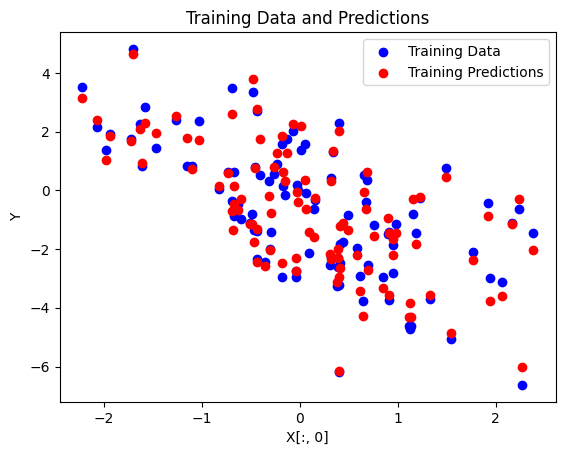

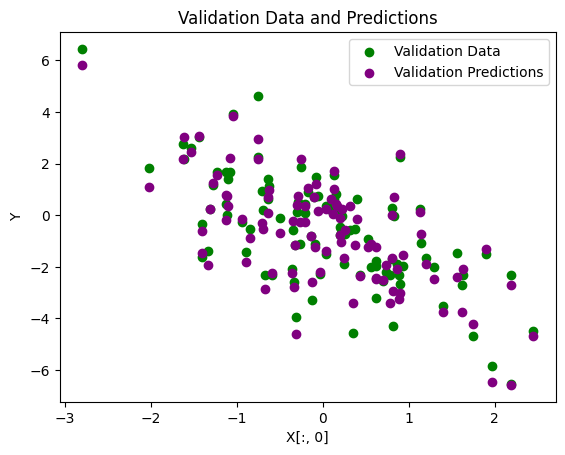

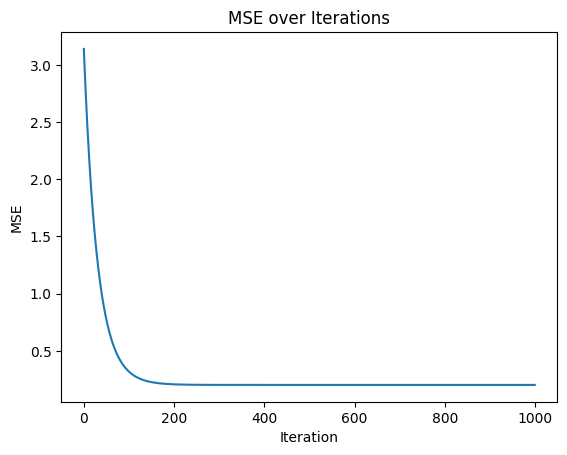

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(0)
X_train = np.random.randn(100, 3)
W_true = np.random.randn(3)
b_true = np.random.randn(1)
Y_train = np.dot(X_train, W_true) + b_true + np.random.randn(100) * 0.5

# 학습률
alpha = 0.01
# 반복 횟수
iterations = 1000

def compute_gradients(X, Y_true, Y_pred):
    n = len(Y_true)
    dW = (2/n) * np.dot(X.T, (Y_pred - Y_true))
    db = (2/n) * np.sum(Y_pred - Y_true)
    return dW, db

# 가중치 및 바이어스 초기화
W = np.random.randn(3)
b = np.random.randn(1)

# 경사 하강법을 통한 학습
mse_history = []

for i in range(iterations):
    # 예측값 계산
    Y_pred = np.dot(X_train, W) + b
    # 기울기 계산
    dW, db = compute_gradients(X_train, Y_train, Y_pred)
    # 가중치 및 바이어스 업데이트
    W = W - alpha * dW
    b = b - alpha * db
    # MSE 계산 및 출력
    mse = np.mean((Y_pred - Y_train) ** 2)
    mse_history.append(mse)
    if i % 100 == 0:
        print(f"Iteration {i}, MSE: {mse}")

print("Final weights:", W)
print("Final bias:", b)

# 검증 데이터 생성
np.random.seed(1)
X_test = np.random.randn(100, 3)
Y_test = np.dot(X_test, W_true) + b_true + np.random.randn(100) * 0.5

# 검증 데이터에 대한 예측
Y_pred_test = np.dot(X_test, W) + b

# 훈련 데이터 및 예측 결과 시각화
plt.scatter(X_train[:, 0], Y_train, color='blue', label='Training Data')
plt.scatter(X_train[:, 0], Y_pred, color='red', label='Training Predictions')
plt.xlabel('X[:, 0]')
plt.ylabel('Y')
plt.legend()
plt.title('Training Data and Predictions')
plt.show()

# 검증 데이터 및 예측 결과 시각화
plt.scatter(X_test[:, 0], Y_test, color='green', label='Validation Data')
plt.scatter(X_test[:, 0], Y_pred_test, color='purple', label='Validation Predictions')
plt.xlabel('X[:, 0]')
plt.ylabel('Y')
plt.legend()
plt.title('Validation Data and Predictions')
plt.show()

# 학습 과정 동안의 MSE 시각화
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.show()


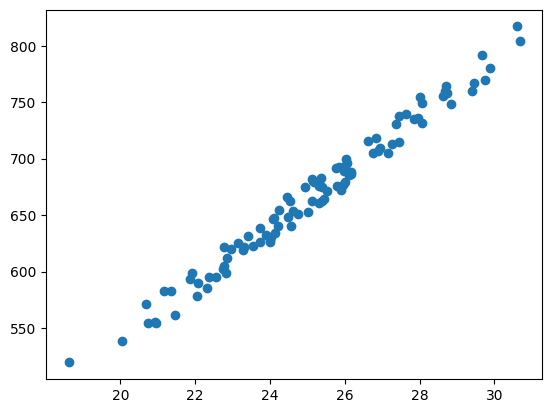

/opt/anaconda3/envs/deep/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1082 - val_loss: 0.1307
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0913 - val_loss: 0.1153
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0788 - val_loss: 0.1018
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0670 - val_loss: 0.0902
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0552 - val_loss: 0.0798
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - val_loss: 0.0714
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0447 - val_loss: 0.0637
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - val_loss: 0.0572
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0340 - val_loss: 0.0512
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0309 - val_loss: 0.0463
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0258 - val_loss: 0.0416
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0241 - val_loss: 0.0377


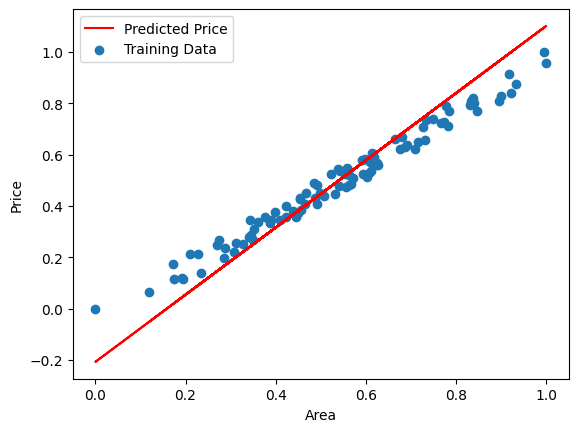

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()




data = (data - data.min()) / (data.max() - data.min())  #Normalize



model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()


model.compile(loss='mean_squared_error', optimizer='sgd')


model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(data['area'])

plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
